## Variable对象

* 对Tensor对象的进一步封装
* 在模型训练过程中自动记录梯度信息，由算法自动优化
* 可以被训练的对象
* 在机器学习中作为模型参数

**创建Variable对象**

```
tf.Variable(initial_value, dtype)
```

`initial_value`: 数字／python列表／numpy数组／tensor张量


In [3]:
import tensorflow as tf

tf.Variable(3) #数字

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [7]:
tf.Variable(3., dtype=tf.float32)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [4]:
tf.Variable([1, 2, 3]) #python列表

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [6]:
import numpy as np

tf.Variable(np.array([1, 2])) #numpy数组

<tf.Variable 'Variable:0' shape=(2,) dtype=int64, numpy=array([1, 2])>

In [9]:
tf.Variable(tf.constant([[1, 2], [3, 4]])) #张量

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

* `trainable`属性

In [12]:
x = tf.Variable(tf.zeros([2, 3]))
x.trainable

True

In [13]:
type(x)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

* 赋值

`对象名.assign()`

`对象名.assign_add()`

`对象名.assign_sub()`

In [15]:
x = tf.Variable([1, 2])
x

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [17]:
x.assign([2, 4])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([2, 4], dtype=int32)>

In [18]:
x.assign_add([1, 1])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([3, 5], dtype=int32)>

In [19]:
x.assign_sub([2, 2])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([1, 3], dtype=int32)>

In [20]:
a = tf.constant([1, 2])
b = tf.Variable(a)
isinstance(a, tf.Tensor)

True

In [21]:
isinstance(b, tf.Variable)

True

## 自动求导机制 `GradientTape`

`GradientTape`类实现了上下文管理器，

```
with tf.GradientTape(persistent, watch_accessed_variables) as tape:
    函数表达式
    grad = tape.gradient(函数, 自变量)
```

persistent：默认为False，表示只使用一次即被删除；若设置为True,记得手动删除。

watch_accessed_variables: 监视所有可训练对象即Variable对象，默认为True;若设置为False，无法自动监视Variable，可手动添加`tape.watch(Variable)`, tape.watch()也可以监视非Variable对象，比如张量对象。

tape.gradient(函数，自变量): 自变量可以是一个也可以是多个

In [22]:
x = tf.Variable(3.)
with tf.GradientTape(persistent=True) as tape:
    y = tf.math.square(x)
    z = tf.math.pow(x, 3)
    
dy_dx = tape.gradient(y, x)
dz_dx = tape.gradient(z, x)

print(y)
print(z)
print(dy_dx)
print(dz_dx)

del tape #注意删除

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(27.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(27.0, shape=(), dtype=float32)


In [25]:
# 求多元偏导数
x = tf.Variable(3.)
y = tf.Variable(4.)

with tf.GradientTape() as tape:
    f = tf.math.square(x) + 2 * tf.math.square(y) + 1

df_dx, df_dy = tape.gradient(f, [x, y])
print(f)
print(df_dx)
print(df_dy)

tf.Tensor(42.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(16.0, shape=(), dtype=float32)


In [28]:
# 求二阶偏导数
x = tf.Variable(3.)
y = tf.Variable(4.)

with tf.GradientTape(persistent=True) as tape2:
    
    with tf.GradientTape(persistent=True) as tape1:
        f = tf.math.square(x) + 2 * tf.math.square(y) + 1
        
    first_grads = tape1.gradient(f, [x, y])
    
second_grads = tape2.gradient(first_grads, [x, y])

print(f)
print(first_grads)
print(second_grads)

del tape1
del tape2

tf.Tensor(42.0, shape=(), dtype=float32)
[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=16.0>]
[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, <tf.Tensor: shape=(), dtype=float32, numpy=4.0>]


In [30]:
# 对向量求导
x = tf.Variable([1., 2., 3.])
y = tf.Variable([4., 5., 6.])

with tf.GradientTape() as tape:
    f = tf.math.square(x) + 2 * tf.math.square(y) + 1
    
df_dx, df_dy = tape.gradient(f, [x, y])
print(f)
print(df_dx)
print(df_dy)

tf.Tensor([34. 55. 82.], shape=(3,), dtype=float32)
tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)
tf.Tensor([16. 20. 24.], shape=(3,), dtype=float32)


**tf.where(condition, a, b)**

condition为真则返回a，为假则返回b

In [33]:
pred = np.array([0.1, 0.5, 0.8, 1.])
tf.where(pred<0.5, 0, 1)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 1, 1], dtype=int32)>

In [35]:
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])
tf.where(pred<=0.5, a, b)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 1,  2, 30, 40])>

## TensorFlow实现一元线性回归

In [31]:
import tensorflow as tf
import numpy as np

# 加载数据
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])

# 设置超参数
learn_rate = 0.0001
iter = 10
display_step = 1

# 初始化参数
np.random.seed(10)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

# 训练模型
mse = []
for i in range(0, iter+1):
    with tf.GradientTape() as tape:
        pred = w * x + b
        Loss = 0.5 * tf.reduce_mean(tf.math.square(y-pred))

    mse.append(Loss)
    dL_dw, dL_db = tape.gradient(Loss, [w, b])
    
    w.assign_sub(learn_rate * dL_dw)
    b.assign_sub(learn_rate * dL_db)
    
    if i % display_step == 0:
        print(f"i: {i}, Loss: {Loss}, w:{w.numpy()}, b:{b.numpy()}")

i: 0, Loss: 0.10826284438371658, w:1.3314887285232544, b:0.7152411341667175
i: 1, Loss: 0.10815290361642838, w:1.3313909769058228, b:0.7152032852172852
i: 2, Loss: 0.10804310441017151, w:1.3312933444976807, b:0.7151654958724976
i: 3, Loss: 0.10793343186378479, w:1.3311957120895386, b:0.71512770652771
i: 4, Loss: 0.10782379657030106, w:1.3310980796813965, b:0.7150899767875671
i: 5, Loss: 0.10771435499191284, w:1.331000566482544, b:0.7150522470474243
i: 6, Loss: 0.10760509967803955, w:1.3309030532836914, b:0.7150145173072815
i: 7, Loss: 0.10749581456184387, w:1.3308056592941284, b:0.7149768471717834
i: 8, Loss: 0.10738673806190491, w:1.3307082653045654, b:0.7149391770362854
i: 9, Loss: 0.10727783292531967, w:1.330610990524292, b:0.7149015665054321
i: 10, Loss: 0.1071690246462822, w:1.3305137157440186, b:0.7148639559745789


## TensorFlow实现一元逻辑回归

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 加载数据
x = np.array()
y = np.array()

plt.scatter(x, y)

#数据处理
x_train = x - np.mean(x) # 0均值
y_train = y
plt.scatter(x_train, y_train)

# 设置超参数
learn_rate = 0.005
iter = 10

display_step = 1
# 设置模型变量初始值
np.random.seed(12)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

# 训练模型
cross_train = []
acc_train = []

for i in range(iter+1):
    
    with tf.GradientTape() as tape:
        pred_train = 1/(1+tf.math.exp(-(w*x_train+b)))
        Loss_train = -tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
    print(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))    
    Accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5, 0, 1), y_train), tf.float32))
    
    cross_train.append(Loss_train)
    acc_train.append(Accuracy_train)
    
    dL_dw, dL_db = tape.gradient(Loss_train, [w, b])
      
    w.assign_sub(learn_rate * dL_dw)
    b.assign_sub(learn_rate * dL_db)
    
#     if i % display_step == 0:
#         print(f"i: {i}, train_loss: {Loss_train}, accuracy: {Accuracy_train}")

## TensorFlow实现多元逻辑回归

In [3]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
TensorFlow version: 2.5.0-rc0


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [5]:
#加载数据集
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split("/")[-1], TRAIN_URL)

TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
test_path = tf.keras.utils.get_file(TEST_URL.split("/")[-1], TEST_URL)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [6]:
#数据处理
df_iris_train = pd.read_csv(train_path, header=0)
df_iris_test = pd.read_csv(test_path, header=0)

iris_train = np.array(df_iris_train)
iris_test = np.array(df_iris_test)

In [7]:
iris_train.shape, iris_test.shape

((120, 5), (30, 5))

In [9]:
train_x = iris_train[:, 0:2]
train_y = iris_train[:, 4]

test_x = iris_test[:, 0:2]
test_y = iris_test[:, 4]

In [10]:
train_x.shape, train_y.shape

((120, 2), (120,))

In [11]:
test_x.shape, test_y.shape

((30, 2), (30,))

In [12]:
x_train = train_x[train_y < 2]
y_train = train_y[train_y < 2]

In [13]:
x_train.shape, y_train.shape

((78, 2), (78,))

In [14]:
x_test = test_x[test_y < 2]
y_test = test_y[test_y < 2]

In [15]:
x_test.shape, y_test.shape

((22, 2), (22,))

In [16]:
num_train = len(x_train)
num_test = len(x_test)

In [17]:
num_train, num_test

(78, 22)

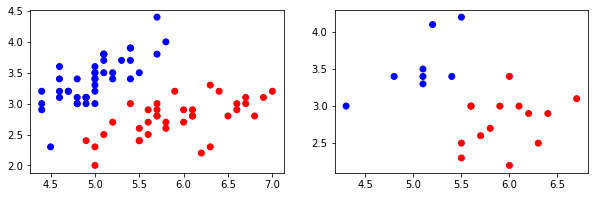

In [20]:
plt.figure(figsize=(10, 3))
cm_pt = mpl.colors.ListedColormap(["blue", "red"])

plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_pt)

plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_pt)

plt.show()

In [21]:
#数据处理 - 按列中心化
print(np.mean(x_train, axis=0))
print(np.mean(x_test, axis=0))

[5.42692308 3.1025641 ]
[5.62727273 3.06363636]


In [22]:
x_train = x_train - np.mean(x_train, axis=0)
x_test = x_test - np.mean(x_test, axis=0)

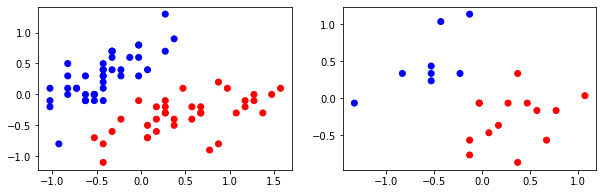

In [23]:
plt.figure(figsize=(10, 3))
cm_pt = mpl.colors.ListedColormap(["blue", "red"])

plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_pt)

plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_pt)

plt.show()

In [25]:
#构建属性矩阵和标签列向量
x0_train = np.ones(num_train).reshape(-1, 1)
X_train = tf.cast(tf.concat((x0_train, x_train), axis=1), dtype=tf.float32)
Y_train = tf.cast(y_train.reshape(-1, 1), dtype=tf.float32)

In [26]:
X_train.shape, Y_train.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

In [27]:
x0_test = np.ones(num_test).reshape(-1, 1)
X_test = tf.cast(tf.concat((x0_test, x_test), axis=1), dtype=tf.float32)
Y_test = tf.cast(y_test.reshape(-1, 1), dtype=tf.float32)

In [29]:
X_test.shape, Y_test.shape

(TensorShape([22, 3]), TensorShape([22, 1]))

In [30]:
#设置超参数，设置模型参数初始值
learn_rate = 0.2
iter = 120

display_step = 30


np.random.seed(30)
W = tf.Variable(np.random.randn(3, 1), dtype=tf.float32)

In [34]:
ce_train = []
ce_test = []
acc_train = []
acc_test = []

for i in range(iter+1):
    with tf.GradientTape() as tape:
        PRED_train = 1/(1+tf.math.exp(-tf.matmul(X_train, W)))
        Loss_train = -tf.reduce_mean(Y_train*tf.math.log(PRED_train)+(1-Y_train)*tf.math.log(1-PRED_train))
        PRED_test = 1/(1+tf.math.exp(-tf.matmul(X_test, W)))
        Loss_test = -tf.reduce_mean(Y_test*tf.math.log(PRED_test)+(1-Y_test)*tf.math.log(1-PRED_test))
        
    accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_train.numpy()<0.5, 0., 1.), Y_train), dtype=tf.float32))
    accuracy_test = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_test.numpy()<0.5, 0., 1.), Y_test), dtype=tf.float32))
    
    ce_train.append(Loss_train)
    ce_test.append(Loss_test)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    dL_dW = tape.gradient(Loss_train, W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step == 0:
        print(f"i: {i}, TrainAcc: {accuracy_train}, TrainLoss: {Loss_train}, TestAcc: {accuracy_test}, TestLoss: {Loss_test}")

i: 0, TrainAcc: 0.7179487347602844, TrainLoss: 0.4470074474811554, TestAcc: 0.5454545617103577, TestLoss: 0.6719871759414673
i: 30, TrainAcc: 0.9358974099159241, TrainLoss: 0.2702495753765106, TestAcc: 0.8636363744735718, TestLoss: 0.37381085753440857
i: 60, TrainAcc: 0.9615384340286255, TrainLoss: 0.21514472365379333, TestAcc: 0.8636363744735718, TestLoss: 0.2829587161540985
i: 90, TrainAcc: 0.9871794581413269, TrainLoss: 0.18427960574626923, TestAcc: 0.9090909361839294, TestLoss: 0.24019552767276764
i: 120, TrainAcc: 1.0, TrainLoss: 0.1629219949245453, TestAcc: 0.9090909361839294, TestLoss: 0.214599609375


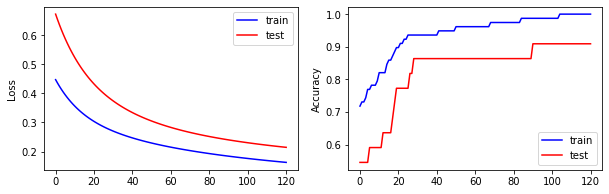

In [37]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(ce_train, color="blue", label="train")
plt.plot(ce_test, color="red", label="test")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(acc_train, color="blue", label="train")
plt.plot(acc_test, color="red", label="test")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# Ref

https://www.bilibili.com/video/BV1hK411w7ei?p=73&spm_id_from=pageDriver